**The rapid spread of the virus necessitates the development of a system for its detection. With the increasing use of technology, a wealth of data about COVID-19 is readily available, which can be harnessed to gather essential information about the virus. In this project, we compared the accuracy of various machine learning algorithms in predicting COVID-19 outcomes and selected the most accurate one for the final model testing. With just eight binary features, our model achieved high accuracy in predicting COVID-19 test results. This paper suggests a practical solution through the development of a health monitoring system that can mitigate the impact of COVID-19.**









#Import Libraries

In [1]:
#Importing libraries
import numpy as np
import pandas as pd

# Visualisation libraries
import seaborn as sns
import matplotlib.pyplot as plt

#Machine Learning libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#To ignore warnings
import warnings
warnings.filterwarnings("ignore")

#Load Data

In [3]:
df=pd.read_csv("/content/corona_tested_006.csv")

#Data Cleaning & Visualization

In [4]:
#create a copy of dataset
covid_data = df.copy()
covid_data

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [5]:
##Number of rows and columns
covid_data.shape

(278848, 11)

The shape function returns the number of rows and columns present in the COVID dataset, which contains 278,848 rows and 11 columns.

In [6]:
# To know the column names of a dataset
covid_data.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

The column function returns the names of the columns present in the COVID dataset.

In [7]:
covid_data.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


the head() function is used for previewing first five rows and understanding the structure and content of Covid_data,





In [8]:
covid_data.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


The tail() function is used for previewing last five rows and understanding the structure and content of Covid_data,


In [9]:
covid_data.sample(5)

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
79556,79557,02-04-2020,FALSE,FALSE,False,False,False,negative,No,female,Other
6701,6702,18-03-2020,FALSE,FALSE,FALSE,FALSE,FALSE,other,No,None,Other
214278,214279,21-04-2020,True,False,False,False,False,negative,None,male,Abroad
249993,249994,26-04-2020,False,False,False,False,False,negative,None,female,Other
270450,270451,29-04-2020,False,False,False,False,False,negative,None,female,Other


The sample() function is used to randomly select a specified number of rows  from Covid_data

In [10]:
#Dataset info
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


the info() function is used to display a concise summary of a covid_data set.

The information contains the number of columns, column labels, column data types, memory usage, range index, and the number of cells in each column (non-null values).

In [11]:
# To count the number of missing values in each column:
covid_data.isnull().sum()

Ind_ID                 0
Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

isnull() returns a DataFrame  of the same shape as the input data, where each element is True if the corresponding value is missing (null) and False otherwise.

---


isnull().sum() is often used to count the number of missing values in each column for DataFrames.





In [12]:
##Dataset description

covid_data.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The describe() function is used to generate descriptive statistics for a DataFrame.


In [13]:
covid_data.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              5
Fever                       5
Sore_throat                 5
Shortness_of_breath         5
Headache                    5
Corona                      3
Age_60_above                3
Sex                         3
Known_contact               3
dtype: int64

 the nunique() function is used to count the number of unique values in a covid_data set

---

# Dropping unnecessary columns

In [14]:
# To drop  columns by column name
covid_data = covid_data.drop(['Ind_ID', 'Test_date'], axis=1)

The drop() function in pandas is used to remove specific rows or columns from a DataFrame

---
**To check the unique values in every column of Covid_data set , use a loop to iterate through each column and then apply the unique() function to each column**


In [15]:
for column_name in covid_data.columns:
    unique_values = covid_data[column_name].unique()
    print(f"Unique values in '{column_name}': {unique_values}")


Unique values in 'Cough_symptoms': ['TRUE' 'FALSE' 'None' False True]
Unique values in 'Fever': ['FALSE' 'TRUE' 'None' False True]
Unique values in 'Sore_throat': ['TRUE' 'FALSE' 'None' False True]
Unique values in 'Shortness_of_breath': ['FALSE' 'TRUE' 'None' False True]
Unique values in 'Headache': ['FALSE' 'TRUE' 'None' False True]
Unique values in 'Corona': ['negative' 'positive' 'other']
Unique values in 'Age_60_above': ['None' 'No' 'Yes']
Unique values in 'Sex': ['None' 'male' 'female']
Unique values in 'Known_contact': ['Abroad' 'Contact with confirmed' 'Other']


In [16]:
# Define the replacement dictionary
replace_dict = {'None': np.nan, 'TRUE': True, 'FALSE': False}

# Columns to apply the replacement to
columns_to_replace = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Apply the replacement dictionary to each column separately
for column in columns_to_replace:
    covid_data[column].replace(replace_dict, inplace=True)





In [17]:
#after replacing ,unique_values
for column_name in covid_data.columns:
    unique_values = covid_data[column_name].unique()
    print(f"Unique values in '{column_name}': {unique_values}")

Unique values in 'Cough_symptoms': [True False nan]
Unique values in 'Fever': [False True nan]
Unique values in 'Sore_throat': [True False nan]
Unique values in 'Shortness_of_breath': [False True nan]
Unique values in 'Headache': [False True nan]
Unique values in 'Corona': ['negative' 'positive' 'other']
Unique values in 'Age_60_above': ['None' 'No' 'Yes']
Unique values in 'Sex': ['None' 'male' 'female']
Unique values in 'Known_contact': ['Abroad' 'Contact with confirmed' 'Other']


In [18]:
covid_data["Corona"].unique()

array(['negative', 'positive', 'other'], dtype=object)

In [19]:
covid_data["Corona"].value_counts()

negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64

In [20]:
#  Replace 'None' with the next valid value using forward fill (ffill)
covid_data["Corona"].replace('other', method='ffill', inplace=True)

In [21]:
#After using ffill ,
covid_data["Corona"].value_counts()

negative    263540
positive     15308
Name: Corona, dtype: int64

In [22]:
covid_data["Age_60_above"].unique()


array(['None', 'No', 'Yes'], dtype=object)

In [23]:
covid_data["Age_60_above"].value_counts()

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64

In [24]:
covid_data['Sex'].value_counts()

female    130158
male      129127
None       19563
Name: Sex, dtype: int64

In [25]:
# Replace 'None' with the next valid value using Backword fill (bfill)
covid_data['Sex'].replace('None', method='bfill', inplace=True)

In [26]:
covid_data['Sex'].value_counts()

male      145878
female    132970
Name: Sex, dtype: int64

In [27]:
covid_data['Known_contact'].value_counts()

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64

In [28]:
#finding missing value after transformation
covid_data.isnull().sum()

Cough_symptoms         252
Fever                  252
Sore_throat              1
Shortness_of_breath      1
Headache                 1
Corona                   0
Age_60_above             0
Sex                      0
Known_contact            0
dtype: int64

In [29]:
# Fill missing values with the mode

covid_data['Cough_symptoms'].fillna(covid_data['Cough_symptoms'].mode()[0], inplace=True)
covid_data['Fever'].fillna(covid_data['Fever'].mode()[0], inplace=True)
covid_data['Sore_throat'].fillna(covid_data['Sore_throat'].mode()[0], inplace=True)
covid_data['Shortness_of_breath'].fillna(covid_data['Shortness_of_breath'].mode()[0], inplace=True)
covid_data['Headache'].fillna(covid_data['Headache'].mode()[0], inplace=True)


In [30]:
#check missing value
covid_data.isnull().sum()

Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

In [31]:
covid_data.describe(include='all')

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,2,2,2,2,2,2,3,2,3
top,False,False,False,False,False,negative,None,male,Other
freq,236620,257096,276922,277271,276434,263540,127320,145878,242741


In [32]:
covid_data["Corona"].value_counts()

negative    263540
positive     15308
Name: Corona, dtype: int64

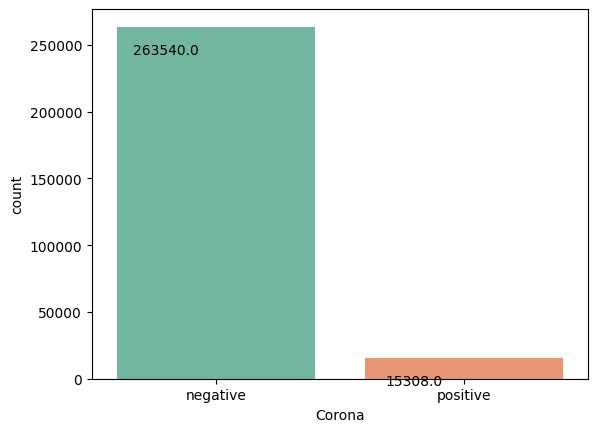

In [91]:
ax = sns.countplot(x='Corona',data=covid_data, palette="Set2")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()


The graph above shows the number of COVID-19 patients. There are 15,308 positive patients, and 263,540 are negative. Therefore, the number of negative patients is greater than the number of positive ones.

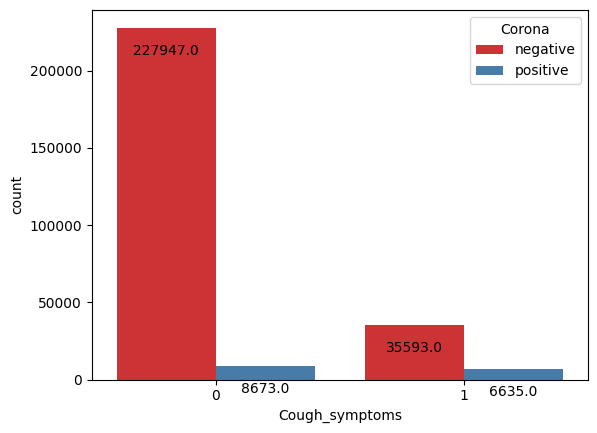

0    236620
1     42228
Name: Cough_symptoms, dtype: int64


In [92]:
#creates a countplot with bars representing the counts of Cough_symptoms

ax = sns.countplot(x='Cough_symptoms',hue='Corona',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()

#values
a=covid_data['Cough_symptoms'].value_counts()
print(a)

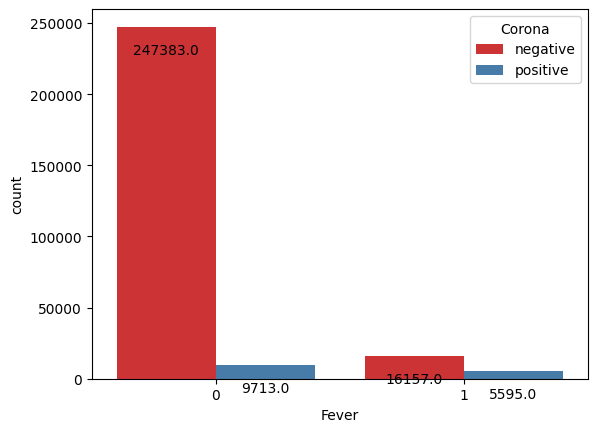

0    257096
1     21752
Name: Fever, dtype: int64


In [93]:
#creates a countplot with bars representing the counts of Fever

ax = sns.countplot(x='Fever',hue='Corona',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()

#values
b=covid_data["Fever"].value_counts()
print(b)

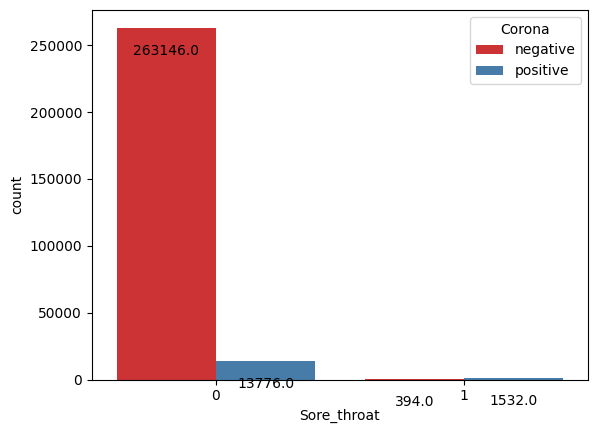

0    276922
1      1926
Name: Sore_throat, dtype: int64


In [94]:
#creates a countplot with bars representing the counts of Sore_throat

ax = sns.countplot(x='Sore_throat',hue='Corona',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()

#values
c=covid_data['Sore_throat'].value_counts()
print(c)

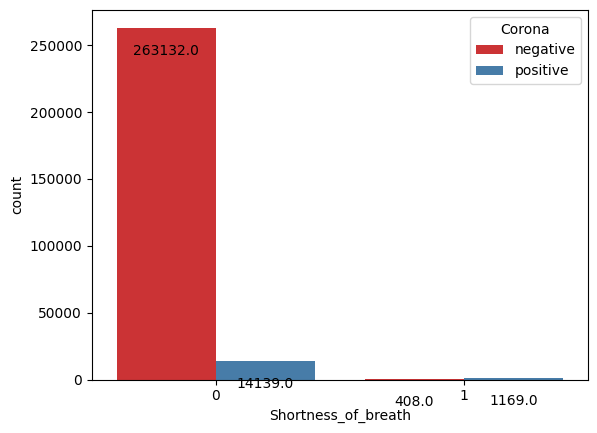

0    277271
1      1577
Name: Shortness_of_breath, dtype: int64


In [95]:
#creates a countplot with bars representing the counts of Shortness_of_breath
ax = sns.countplot(x='Shortness_of_breath',hue='Corona',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()

#value
d=covid_data['Shortness_of_breath'].value_counts()
print(d)

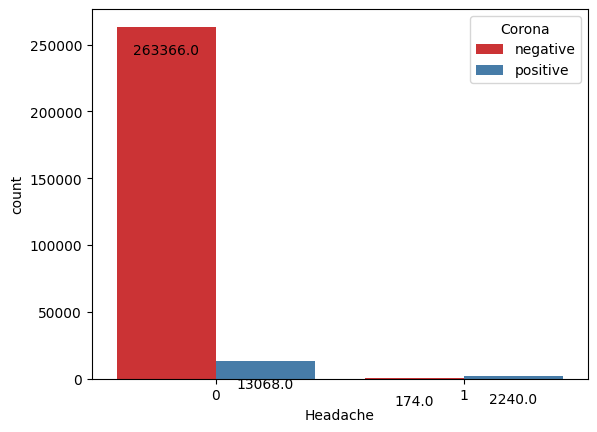

0    276434
1      2414
Name: Headache, dtype: int64


In [96]:
#creates a countplot with bars representing the counts of Headache

ax = sns.countplot(x='Headache',hue='Corona',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()

#values
e=covid_data["Headache"].value_counts()
print(e)

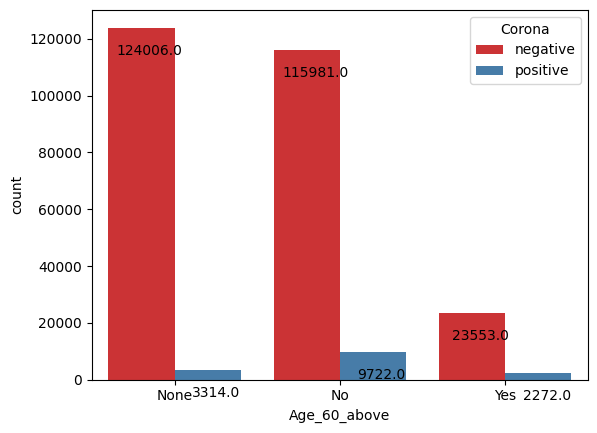

None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64


In [97]:
#creates a countplot with bars representing the counts of Age_60_above

ax = sns.countplot(x='Age_60_above',hue='Corona',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()

#values
f=covid_data['Age_60_above'].value_counts()
print(f)

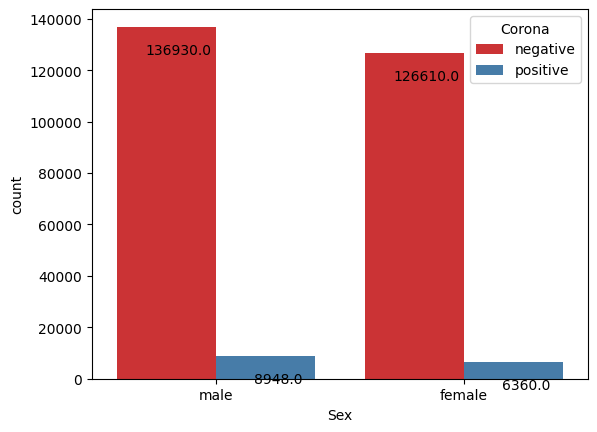

male      145878
female    132970
Name: Sex, dtype: int64


In [98]:
#creates a countplot with bars representing the counts of sex

ax = sns.countplot(x='Sex',hue='Corona',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()

#values
g=covid_data['Sex'].value_counts()
print(g)

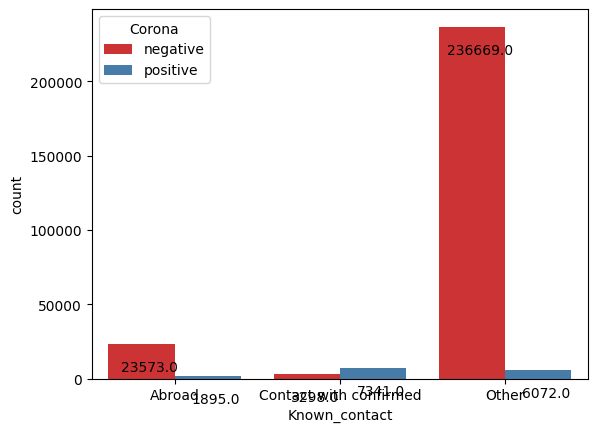

Other                     242741
Abroad                     25468
Contact with confirmed     10639
Name: Known_contact, dtype: int64


In [101]:
#creates a countplot with bars representing the counts of known_contact

ax = sns.countplot(x='Known_contact',hue='Corona',data=covid_data, palette="Set1")
for p in ax.patches:
     ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.25, p.get_height()+100), ha='center', va='top', color='black', size=10)
plt.show()

#values
h=covid_data['Known_contact'].value_counts()
print(h)

In [102]:
#checking datatype of features
covid_data.dtypes

Cough_symptoms          int64
Fever                   int64
Sore_throat             int64
Shortness_of_breath     int64
Headache                int64
Corona                 object
Age_60_above           object
Sex                    object
Known_contact          object
dtype: object

#Encoding the Features

---
#Label encoding


In [44]:
#Import label encoder
from sklearn import preprocessing

#label_encoder object knows how to understand word labels
label_encoder = preprocessing.LabelEncoder()

In [45]:
# List of columns to convert
boolean_columns = ['Cough_symptoms', 'Fever', 'Sore_throat', 'Shortness_of_breath', 'Headache']

# Apply label encoding to each boolean column
for column in boolean_columns:
    covid_data[column] = label_encoder.fit_transform(covid_data[column])

# Display the DataFrame with encoded values
print(covid_data)


        Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0                    1      0            1                    0         0   
1                    0      1            0                    0         0   
2                    0      1            0                    0         0   
3                    1      0            0                    0         0   
4                    1      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
278843               0      0            0                    0         0   
278844               0      0            0                    0         0   
278845               0      0            0                    0         0   
278846               0      0            0                    0         0   
278847               0      0            0                    0         0   

          Corona Age_60_above     Sex           Known_contact  
0       neg

In [103]:
# Create an instance of the OneHotEncoder
ohe =OneHotEncoder(drop='first', handle_unknown='ignore',sparse=False)

# Specify the columns to one-hot encode
columns_to_encode = ["Age_60_above", "Sex", "Known_contact", "Corona"]

# Fit and transform the specified columns
encoded_columns = ohe.fit_transform(covid_data[columns_to_encode])

# Create a DataFrame from the one-hot encoded columns
encoded_df = pd.DataFrame(encoded_columns, columns=ohe.get_feature_names_out(input_features=columns_to_encode))

# Concatenate the one-hot encoded DataFrame with the original DataFrame
covid_data_encoded = pd.concat([covid_data.drop(columns=columns_to_encode), encoded_df], axis=1)

# Resulting DataFrame with one-hot encoding applied to multiple columns
print(covid_data_encoded)

        Cough_symptoms  Fever  Sore_throat  Shortness_of_breath  Headache  \
0                    1      0            1                    0         0   
1                    0      1            0                    0         0   
2                    0      1            0                    0         0   
3                    1      0            0                    0         0   
4                    1      0            0                    0         0   
...                ...    ...          ...                  ...       ...   
278843               0      0            0                    0         0   
278844               0      0            0                    0         0   
278845               0      0            0                    0         0   
278846               0      0            0                    0         0   
278847               0      0            0                    0         0   

        Age_60_above_None  Age_60_above_Yes  Sex_male  \
0                 

In [47]:
covid_data_encoded.sample(5)

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above_None,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other,Corona_positive
182763,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
239043,0,0,0,0,0,1.0,0.0,1.0,0.0,1.0,0.0
21377,1,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
108354,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,0.0
51771,0,0,0,0,0,0.0,0.0,1.0,0.0,1.0,0.0


array([[<Axes: title={'center': 'Cough_symptoms'}>,
        <Axes: title={'center': 'Fever'}>,
        <Axes: title={'center': 'Sore_throat'}>],
       [<Axes: title={'center': 'Shortness_of_breath'}>,
        <Axes: title={'center': 'Headache'}>,
        <Axes: title={'center': 'Age_60_above_None'}>],
       [<Axes: title={'center': 'Age_60_above_Yes'}>,
        <Axes: title={'center': 'Sex_male'}>,
        <Axes: title={'center': 'Known_contact_Contact with confirmed'}>],
       [<Axes: title={'center': 'Known_contact_Other'}>,
        <Axes: title={'center': 'Corona_positive'}>, <Axes: >]],
      dtype=object)

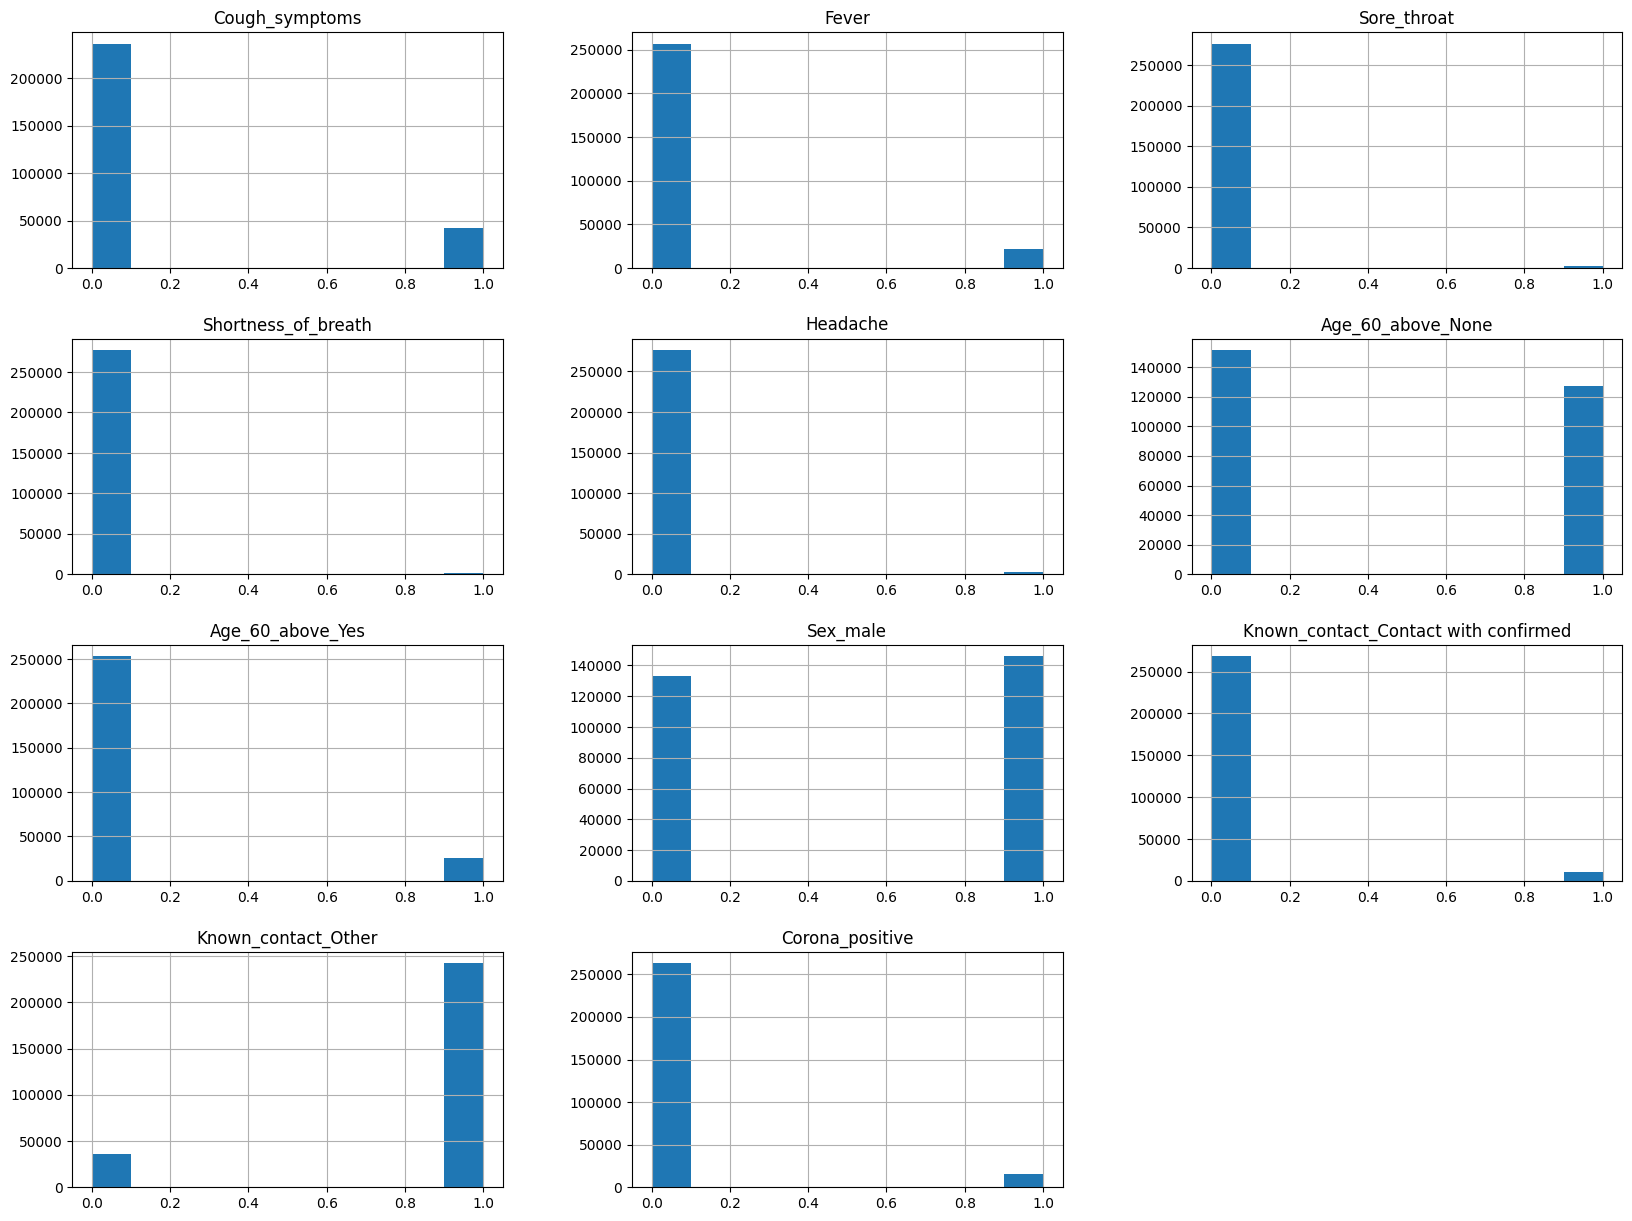

In [48]:
#create a histogram for each column
covid_data_encoded.hist(figsize=(20,15))


<Axes: >

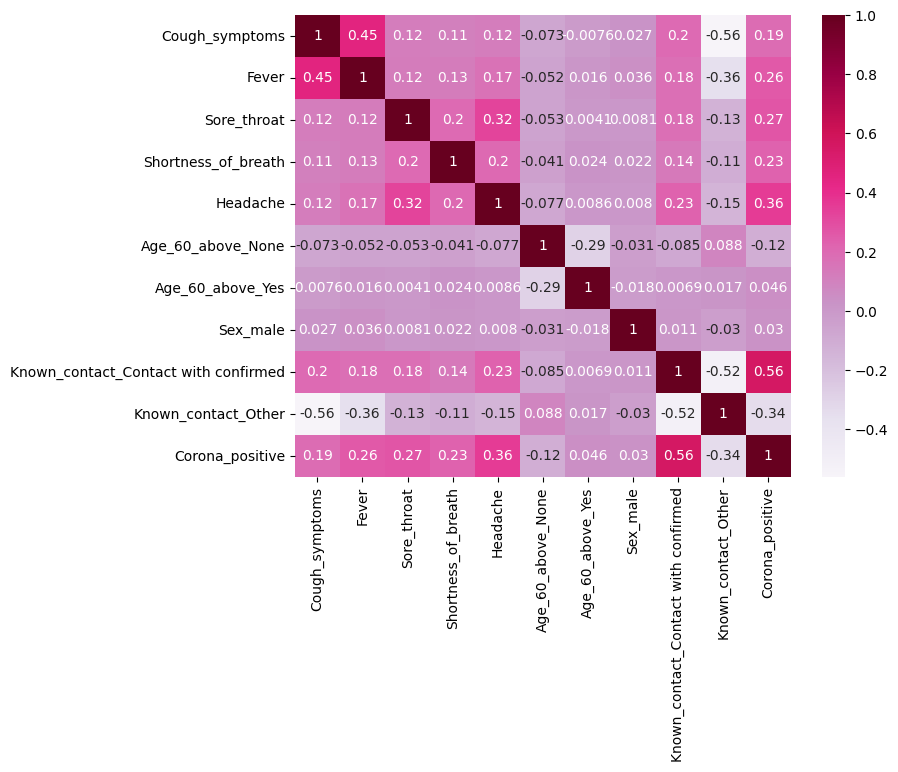

In [104]:
# create a heatmap of the correlation matrix for the covid_data_encoded DataFrame
plt.figure(figsize=(8,6))
sns.heatmap(covid_data_encoded.corr(), annot=True, cmap="PuRd")


The resulting heatmap visually represents the correlations between different pairs of columns in the covid_data_encoded DataFrame.

In [105]:
#after encoding check missing values
covid_data_encoded.isnull().sum()

Cough_symptoms                          0
Fever                                   0
Sore_throat                             0
Shortness_of_breath                     0
Headache                                0
Age_60_above_None                       0
Age_60_above_Yes                        0
Sex_male                                0
Known_contact_Contact with confirmed    0
Known_contact_Other                     0
Corona_positive                         0
dtype: int64

In [51]:
#Extracting Independent and dependent Variable

X= covid_data_encoded.drop(['Corona_positive'], axis =1)
y= covid_data_encoded['Corona_positive']

In [106]:
#Independent variables
X.head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above_None,Age_60_above_Yes,Sex_male,Known_contact_Contact with confirmed,Known_contact_Other
0,1,0,1,0,0,1.0,0.0,1.0,0.0,0.0
1,0,1,0,0,0,1.0,0.0,1.0,0.0,0.0
2,0,1,0,0,0,1.0,0.0,1.0,0.0,0.0
3,1,0,0,0,0,1.0,0.0,1.0,0.0,0.0
4,1,0,0,0,0,1.0,0.0,1.0,1.0,0.0


In [107]:
#Dependent variables
y.head()

0    0.0
1    1.0
2    1.0
3    0.0
4    0.0
Name: Corona_positive, dtype: float64

In [55]:
y.info


<bound method Series.info of 0         0.0
1         1.0
2         1.0
3         0.0
4         0.0
         ... 
278843    1.0
278844    0.0
278845    0.0
278846    0.0
278847    0.0
Name: Corona_positive, Length: 278848, dtype: float64>

In [56]:
y.value_counts()

0.0    263540
1.0     15308
Name: Corona_positive, dtype: int64

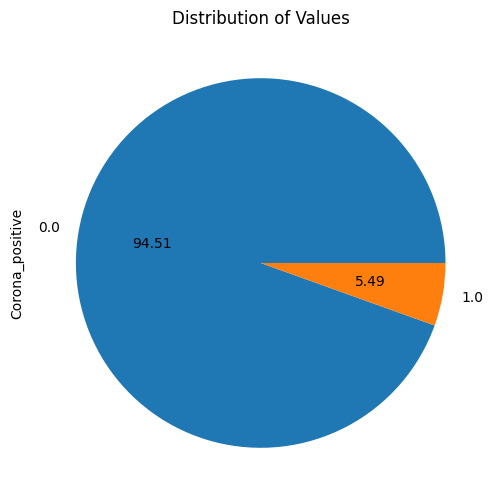

In [57]:
# Create a pie chart
plt.figure(figsize=(6, 6))  # Adjust the figure size if needed
y.value_counts().plot.pie(autopct='%.2f')

# Add a title
plt.title('Distribution of Values')

# Show the plot
plt.show()

 the data have been shown is imbalanced. In imbalanced data, one class (in this case, "0.0") significantly outnumbers the other class ("1.0"). Imbalanced datasets can pose challenges when training machine learning models because the model may become biased toward the majority class and perform poorly on the minority class.

#Undersampling the Data

In [108]:
# import the RandomUnderSampler class from imblearn
from imblearn.under_sampling import RandomUnderSampler   #imbalanced-learn library

rus = RandomUnderSampler(sampling_strategy='auto')

X_res, y_res = rus.fit_resample(X, y)

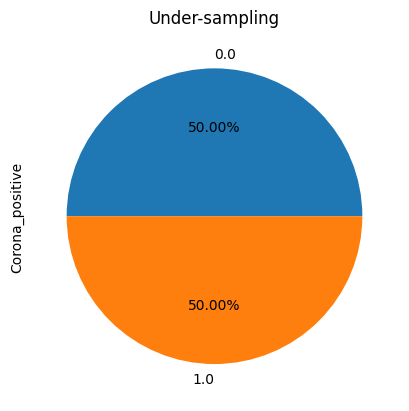

In [109]:
# Assuming y_res is a pandas Series
ax = y_res.value_counts().plot.pie(autopct='%.2f%%')

# Set the title for the pie chart
ax.set_title("Under-sampling")

# Display the pie chart
plt.show()








In [110]:
y_res.info

<bound method Series.info of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
30611    1.0
30612    1.0
30613    1.0
30614    1.0
30615    1.0
Name: Corona_positive, Length: 30616, dtype: float64>

In [111]:
y_res.value_counts()

0.0    15308
1.0    15308
Name: Corona_positive, dtype: int64

#Splitting the dataset into train and test set

In [112]:
##Splitting the dataset

X_train, X_test, y_train, y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=25)


In [63]:
X_res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30616 entries, 0 to 30615
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Cough_symptoms                        30616 non-null  int64  
 1   Fever                                 30616 non-null  int64  
 2   Sore_throat                           30616 non-null  int64  
 3   Shortness_of_breath                   30616 non-null  int64  
 4   Headache                              30616 non-null  int64  
 5   Age_60_above_None                     30616 non-null  float64
 6   Age_60_above_Yes                      30616 non-null  float64
 7   Sex_male                              30616 non-null  float64
 8   Known_contact_Contact with confirmed  30616 non-null  float64
 9   Known_contact_Other                   30616 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 2.3 MB


In [64]:
print(X_res.shape, X_train.shape, X_test.shape)

(30616, 10) (21431, 10) (9185, 10)


In [65]:
print(y_res.shape, y_train.shape, y_test.shape)

(30616,) (21431,) (9185,)


#Implementing the Logistic Regression Model

In [66]:
#Fitting the Logistic Regression model

from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, recall_score, accuracy_score, precision_score, f1_score

In [67]:
log=LogisticRegression(random_state = 52)

In [68]:
# Passing independant and dependant training data to the model fot training
log.fit(X_train,y_train)

LogisticRegression(random_state=52)

Prediction on the test set

In [113]:
#accuracy on training data
y_train_prediction = log.predict(X_train)
training_data_accuracy = accuracy_score(y_train_prediction, y_train)

print(training_data_accuracy)

0.8254397834912043


In [70]:
#accuracy on test data
y_test_prediction =log.predict(X_test)
test_data_accuracy_lr = accuracy_score(y_test_prediction, y_test)

print(test_data_accuracy_lr)


0.8347305389221557


Actual values and the predicted values

In [114]:
#Actual value and the predicted value
a = pd.DataFrame({'Actual value': y_test, 'Predicted value':y_test_prediction})
a.sample(5)

,Actual value,Predicted value
6783,0.0,0.0
24549,1.0,1.0
18195,1.0,1.0
27558,1.0,0.0
16916,1.0,1.0


Evaluating the Model

              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85      4569
         1.0       0.92      0.73      0.82      4616

    accuracy                           0.83      9185
   macro avg       0.85      0.84      0.83      9185
weighted avg       0.85      0.83      0.83      9185



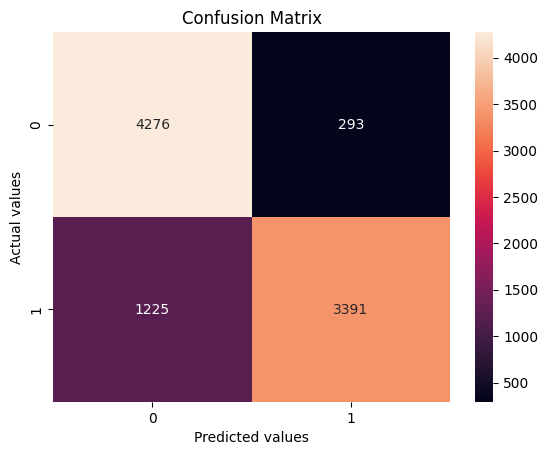

In [115]:
#Confusion matrix and classification report

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_test_prediction)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

print(classification_report(y_test, y_test_prediction))

There were 30616 records in dataset,out of which 70% of the data was given for training the model and 30% of the data , i.e 9185 records ,were given for testing the model. and out of 9185 records ,1515 records were misclassified.

#Implementing the Decision Tree Model

In [73]:
# Importing Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

# Importing train_test_split function
from sklearn.model_selection import train_test_split

#Importing scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn import tree

In [74]:
# Create Decision Tree classifer object
classification = DecisionTreeClassifier(criterion="entropy", splitter="best", max_depth = 10,random_state = 52)

# Train Decision Tree Classifer
classification = classification.fit(X_train,y_train)


In [116]:
#accuracy on training data
y_train_prediction_dt = classification.predict(X_train)
training_data_accuracy_dt = accuracy_score(y_train_prediction_dt, y_train)

print(training_data_accuracy_dt)

0.8422845410853437


In [118]:
#Predict the response for test dataset
y_test_prediction_dt = classification.predict(X_test)

# Model Accuracy score,
test_data_accuracy_dt = accuracy_score(y_test_prediction_dt, y_test)
print(test_data_accuracy_dt)

0.8504082743603701


 # Creating the Confusion Matrix

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      4569
         1.0       0.92      0.77      0.84      4616

    accuracy                           0.85      9185
   macro avg       0.86      0.85      0.85      9185
weighted avg       0.86      0.85      0.85      9185



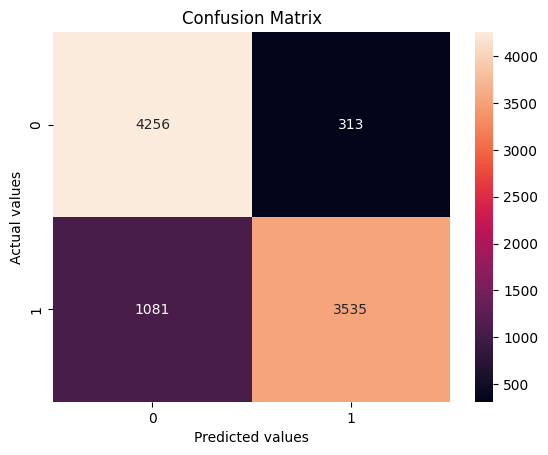

In [77]:
#Confusion matrix and classification report

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_test_prediction_dt)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

print(classification_report(y_test, y_test_prediction_dt))

There were 30616 records in dataset,out of which 70% of the data was given for training the model and 30% of the data , i.e 9185 records ,were given for testing the model. and out of 9185 records ,1386 records were misclassified

#Implementing the Random Forest Model

In [78]:
#Fitting a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

classifier= RandomForestClassifier(n_estimators= 11,criterion="entropy",max_depth=11,random_state = 52)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, n_estimators=11,
                       random_state=52)

In [120]:
#accuracy on training data
y_train_prediction_rf = classifier.predict(X_train)
training_data_accuracy_rf = accuracy_score(y_train_prediction_rf, y_train)

print(training_data_accuracy_rf)

0.8425645093556063


In [121]:
#accuracy on training data
y_test_prediction_rf = classifier.predict(X_test)
test_data_accuracy_rf = accuracy_score(y_test_prediction_rf, y_test)

print(test_data_accuracy_rf)

0.850081654872074


#  Creating the Confusion Matrix

              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86      4569
         1.0       0.92      0.76      0.84      4616

    accuracy                           0.85      9185
   macro avg       0.86      0.85      0.85      9185
weighted avg       0.86      0.85      0.85      9185



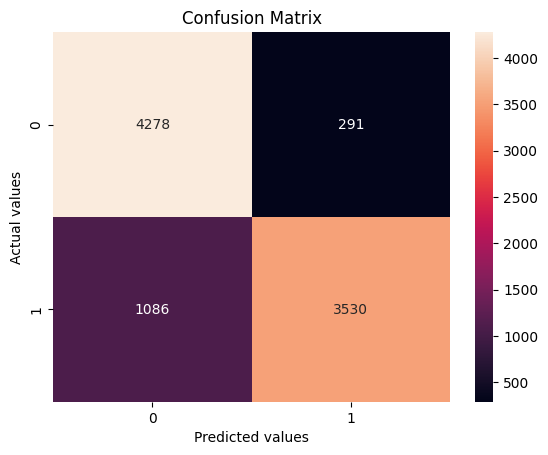

In [122]:
#Confusion matrix and classification report

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_test_prediction_rf)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

print(classification_report(y_test, y_test_prediction_rf))

There were 30616 records in dataset,out of which 70% of the data was given for training the model and 30% of the data , i.e 9185 records ,were given for testing the model. and out of 9185 records ,1376 records were misclassified

# Implementing the Support Vector Machines Model

In [81]:
#Importing SVM model
from sklearn import svm

#Creating a svm Classifier
clf = svm.SVC( kernel='rbf',random_state = 52) # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_test_prediction_svm = clf.predict(X_test)
y_test_prediction_svm

array([0., 1., 0., ..., 1., 1., 0.])

In [123]:
#accuracy on training data
y_train_prediction_svm = clf.predict(X_train)
training_data_accuracy_svm = accuracy_score(y_train_prediction_svm, y_train)

print(training_data_accuracy_svm)

0.8425645093556063


In [124]:
#accuracy on training data
y_test_prediction_svm = clf.predict(X_test)
test_data_accuracy_svm = accuracy_score(y_test_prediction_svm, y_test)

print(test_data_accuracy_svm)


0.8519324986390855


#  Creating the Confusion Matrix

              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86      4569
         1.0       0.92      0.76      0.84      4616

    accuracy                           0.85      9185
   macro avg       0.86      0.85      0.85      9185
weighted avg       0.86      0.85      0.85      9185



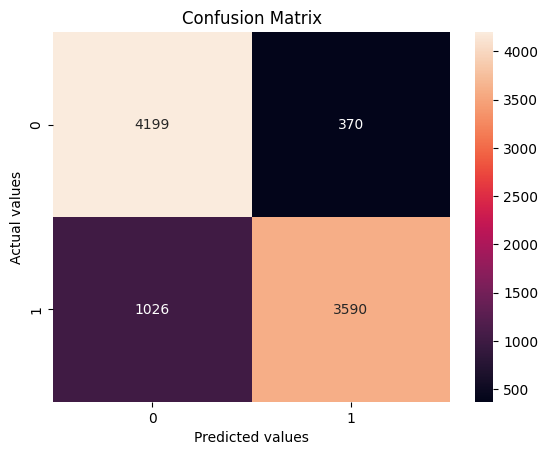

In [83]:
#Confusion matrix and classification report

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_test_prediction_svm)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

print(classification_report(y_test, y_test_prediction_rf))

There were 30616 records in dataset,out of which 70% of the data was given for training the model and 30% of the data , i.e 9185 records ,were given for testing the model. and out of 9185 records ,1381 records were misclassified

# Implementing the K-Nearest Neighbor Model

In [84]:
#Fitting K-NN classifier to the Training data:
from sklearn.neighbors import KNeighborsClassifier
classifiers= KNeighborsClassifier(n_neighbors=11, metric='minkowski', p=2)

#Fitting K-NN classifier to the Training data:
classifiers.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [126]:
#accuracy on training data
y_train_prediction_knn = log.predict(X_train)
training_data_accuracy_knn = accuracy_score(y_train_prediction_knn, y_train)

print(training_data_accuracy_knn)

0.8254397834912043


In [127]:
#Predicting the test set result
y_test_prediction_knn = classifiers.predict(X_test)
test_data_accuracy_knn = accuracy_score(y_test_prediction_knn, y_test)

print(test_data_accuracy_knn)

0.8459444746869896


#  Creating the Confusion Matrix

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.85      4569
         1.0       0.90      0.77      0.83      4616

    accuracy                           0.84      9185
   macro avg       0.85      0.84      0.84      9185
weighted avg       0.85      0.84      0.84      9185



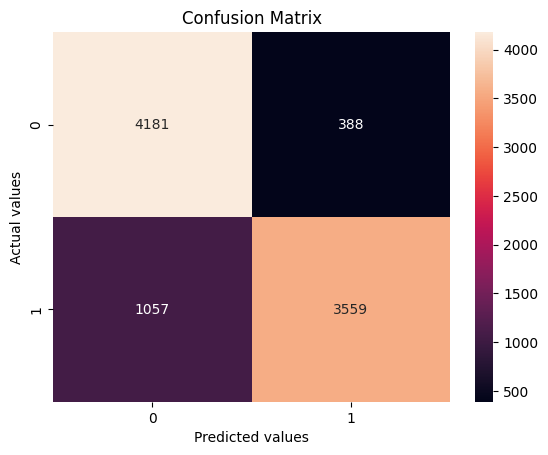

In [86]:
#Confusion matrix and classification report

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

matrix = confusion_matrix(y_test, y_test_prediction_knn)
sns.heatmap(matrix, annot=True, fmt="d")
plt.title('Confusion Matrix')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

print(classification_report(y_test, y_test_prediction_knn))

There were 30616 records in dataset,out of which 70% of the data was given for training the model and 30% of the data , i.e 9185 records ,were given for testing the model. and out of 9185 records ,1376 records were misclassified